<a href="https://colab.research.google.com/github/Golden028/Machine_Learning/blob/main/JS13_TG09_2341720216_GOLDEN_CHRISTIAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab1**

## Step 1 - Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

## Step 2 - Load Data and Visualization

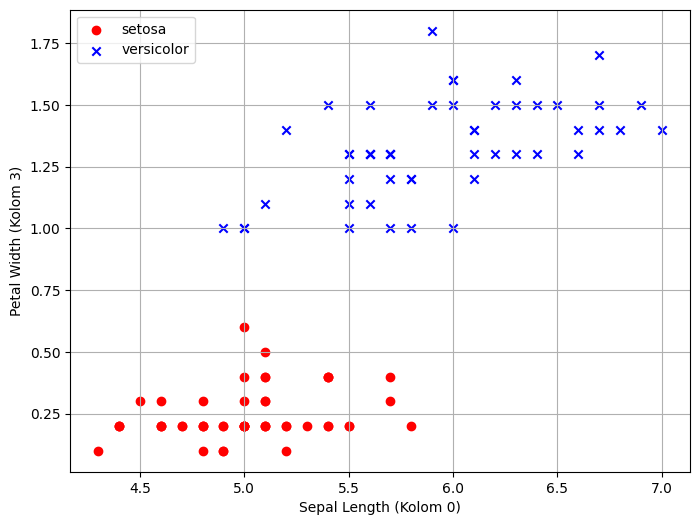

In [ ]:
# Memuat data dari 'iris (1).csv', melewati baris header (skiprows=1)
# dan memastikan penamaan kolom dengan indeks 0 hingga 4 (header=None).
df = pd.read_csv('/content/drive/MyDrive/ML/Iris.csv', header=None, skiprows=1)

# Mengonversi kolom fitur (0, 1, 2, 3) ke tipe data numerik.
for col in [0, 1, 2, 3]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Visualisasi Data (Sama seperti kode asli) ---
# Kolom 0: Sepal Length, Kolom 3: Petal Width (digunakan di sini karena hasilnya lebih jelas)
setosa = df[df[4] == 'setosa'] # Perhatikan: label mungkin 'setosa' atau 'Iris-setosa'
versicolor = df[df[4] == 'versicolor']

# Jika data Anda memiliki label 'Iris-setosa' dan 'Iris-versicolor', gunakan:
# setosa = df[df[4] == 'Iris-setosa']
# versicolor = df[df[4] == 'Iris-versicolor']

a, b = 0, 3
plt.figure(figsize=(8, 6))
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Sepal Length (Kolom 0)')
plt.ylabel('Petal Width (Kolom 3)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Step 3 - Create Perceptron Class

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Step 4 - Select Data and Encode Labels

In [ ]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 3]].values

## Step 5 - Fit the Model

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

print(f"Bobot Akhir (w0, w1, w2): {ppn.w_}")
print(f"Error per Epoch: {ppn.errors_}")

Bobot Akhir (w0, w1, w2): [0. 0. 0.]
Error per Epoch: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Step 6 - Visualize Error Value per Epoch

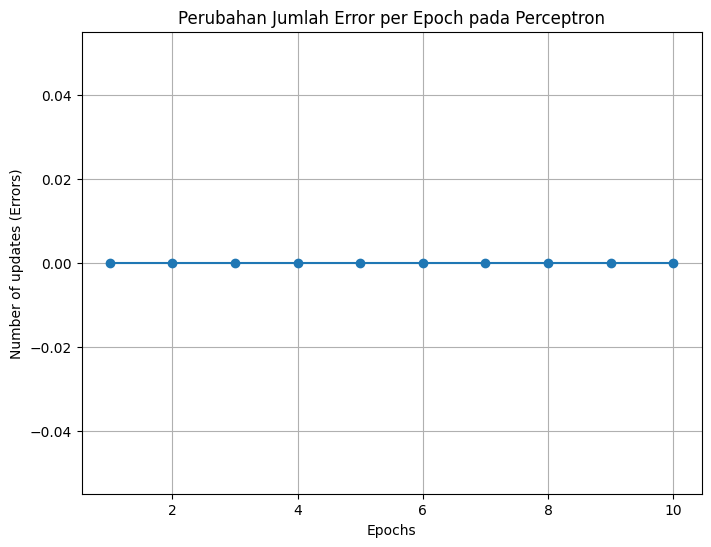

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (Errors)')
plt.title('Perubahan Jumlah Error per Epoch pada Perceptron')
plt.grid()
plt.savefig('perceptron_errors_vs_epochs.png')

## Step 7 - Visualize the Decision Boundary

/tmp/ipython-input-391121737.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


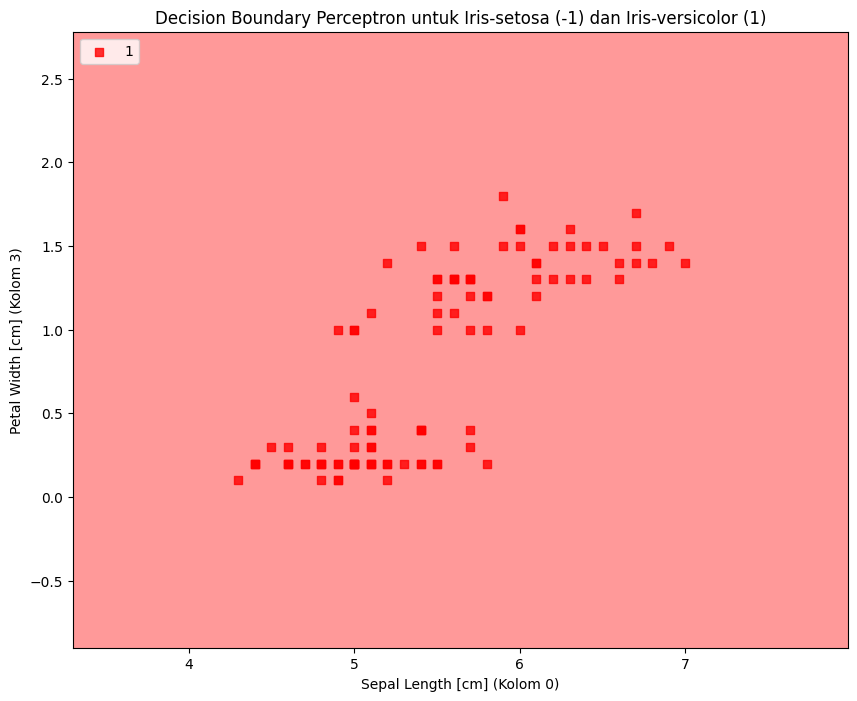

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# --- Langkah 7 - Membuat Fungsi plot_decision_regions ---
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    # Menggunakan np.unique(y) untuk menentukan jumlah kelas dan warna yang dibutuhkan
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        # Mapping label -1 ke index 0 (merah) dan 1 ke index 1 (biru)
        # c=cmap(i) menggunakan index i dari cmap
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# --- Memanggil Fungsi untuk Visualisasi Decision Boundary ---
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm] (Kolom 0)')
plt.ylabel('Petal Width [cm] (Kolom 3)')
plt.title('Decision Boundary Perceptron untuk Iris-setosa (-1) dan Iris-versicolor (1)')
plt.legend(loc='upper left')
plt.savefig('perceptron_decision_boundary.png')

# Lab 2

## Step 1 - Import Libraries

In [ ]:
from sklearn.neural_network import MLPClassifier

## Step 2 - Create Data

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

## Step 3 - Fit the Model

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

## Step 4 - Prediction

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Lab 3

## Data Preprocessing

## Step 1 - Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Step 2 - Load Data

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


## Step 3 - Encode Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


## Step 4 - Encode the "Geography" Column with One Hot Encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


## Step 5 - Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Step 6 - Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Constructing the ANN Model

## Step 1 - Initialize the ANN Model

In [ ]:
ann = tf.keras.models.Sequential()

## Step 2 - Create the Input Layer and the First Hidden Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Step 3 - Create the Second Hidden Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Step 4 - Create the Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the Model

## Step 1 - Compile the ANN Model (Unify the Architecture)

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Step 2 - Fit the Model

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8070 - loss: 0.5117
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7948 - loss: 0.4602
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7977 - loss: 0.4389
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7942 - loss: 0.4390
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7928 - loss: 0.4333
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.4206
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7995 - loss: 0.4249
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8048 - loss: 0.4222
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8185 - loss: 0.4077
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8222 - loss: 0.4121
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8218 - loss: 0.4061
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Making Predictions

Given the following information,
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: $ 60000

- Number of Products: 2
- Does this customer have a credit card? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

Should this customer be retained?

## Model the New Data and Make a Prediction

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[[False]]


## Predictions with the Testing Data

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Evaluate Accuracy and the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1516   79]
 [ 199  206]]


0.861

# Lab 4

## Step 1 - Import Libraries

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

## Step 2 - Load Dataset

In [ ]:
# Load images and labels from a directory structure
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []
    for folder in p.glob('*'):
        label = folder.name
        for file in folder.glob('*.jpg'):
            img = cv2.imread(str(file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append((img, label))
    return img_list

train_dir = "/content/drive/MyDrive/ML/images/training"
test_dir  = "/content/drive/MyDrive/ML/images/test"

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)

## Step 2 - Pre-processing

In [ ]:
# Preprocess images: resize and encode labels
def resize_image(img, size=(256,256)):
    return cv2.resize(img, size)

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    X = []
    y = []
    for img, label in img_list:
        img_std = resize_image(img)
        X.append(img_std)
        y.append(label_encoder(label))
    return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img,  y_test  = preprocess(test_img)

## Step 3 - Feature Extraction

In [ ]:
# Extract HOG features
def extract_hog(X_imgs):
    feats = []
    for img in X_imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8,8),
                       cells_per_block=(2,2),
                       block_norm='L2-Hys',
                       visualize=False,
                       feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat  = extract_hog(X_test_img)

## Step 4 - Feature Standardization

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

## Step 5 - Create Training and Validation Data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42
)

# Convert label ke numpy array
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

## Step 6 - Construct the ANN Model

In [ ]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

## Step 7 - Train the Model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.6991 - loss: 1.1366 - val_accuracy: 0.9583 - val_loss: 0.3558
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9854 - loss: 0.0682 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9985 - loss: 0.0144 - val_accuracy: 0.9583 - val_loss: 0.0511
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 1.0000 - loss: 2.2603e-04 - val_accuracy: 0.9583 - val_loss: 0.0441
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 3.2247e-05 - val_accuracy: 0.9583 - val_loss: 0.0395
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 1.0000 - loss: 2.5402e-05 - val_accuracy: 0.9583 - val_loss: 0.0342
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 1.0000 - loss: 1.4765e-05 - val_accuracy: 0.9792 - val_loss: 0.0309
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 1.0000 - loss: 2.3658e-05 - val_accuracy: 0.97

## Step 8 - Evaluate the Model with Test Data

In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Akurasi Test:", test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8692 - loss: 0.5563
Akurasi Test: 0.887499988079071


## Step 9 - Generate a Model Performance Report

In [ ]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        80
           1       0.92      0.85      0.88        80

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160

[[74  6]
 [12 68]]


## Step 10 - Visualize the Training Process

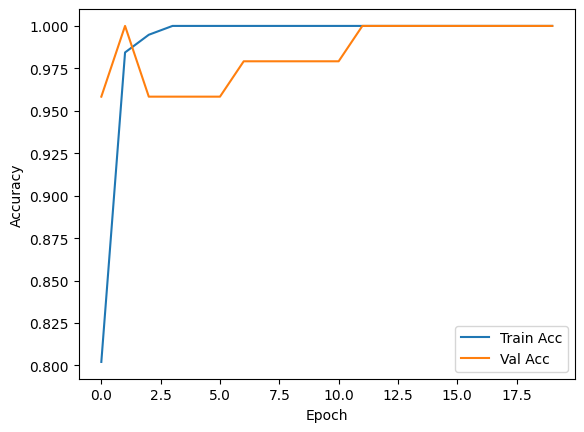

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Step 11 - Save the Model

In [ ]:
model.save('day_night_classifier_model.h5')

# Lab Assignment

- Perform classification on the MNIST dataset using an ANN model
- You are permitted to conduct exploration of,
  - Preprocessing methods
  - Feature selection
  - ANN architecture
  - Activation functions
- The ANN is implemented using TensorFlow.

# Task
The user wants to perform classification on the MNIST dataset using an ANN model. This task will involve loading the MNIST dataset, preprocessing the image data, defining an Artificial Neural Network architecture, compiling and training the model, evaluating its performance, and visualizing the training history and sample predictions. A comprehensive summary of the entire process will also be provided.

## Load MNIST Dataset

### Subtask:
Load the MNIST dataset using TensorFlow/Keras built-in functions. This will provide the training and testing images and their corresponding labels.


**Reasoning**:
To load the MNIST dataset, I will import it from `tensorflow.keras.datasets` and then use `mnist.load_data()` to retrieve the training and testing data.



In [51]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


## Preprocess Data

### Subtask:
Preprocess the loaded MNIST data. This typically involves normalizing pixel values to a range (e.g., 0-1) and reshaping the images if necessary for the ANN input (e.g., flattening 2D images into 1D vectors). Also, convert labels to one-hot encoding if using categorical crossentropy loss.


**Reasoning**:
I will reshape the image data, normalize the pixel values, and one-hot encode the labels as per the instructions to preprocess the MNIST dataset.



In [52]:
import numpy as np

# Reshape image data from 2D (28x28) to 1D (784)
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values
x_train_normalized = x_train_reshaped.astype('float32') / 255.0
x_test_normalized = x_test_reshaped.astype('float32') / 255.0

# Convert labels to one-hot encoded format
num_classes = 10 # MNIST has 10 classes (digits 0-9)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

print("x_train_normalized shape:", x_train_normalized.shape)
print("x_test_normalized shape:", x_test_normalized.shape)
print("y_train_one_hot shape:", y_train_one_hot.shape)
print("y_test_one_hot shape:", y_test_one_hot.shape)

x_train_normalized shape: (60000, 784)
x_test_normalized shape: (10000, 784)
y_train_one_hot shape: (60000, 10)
y_test_one_hot shape: (10000, 10)


## Define ANN Architecture

### Subtask:
Define the Artificial Neural Network (ANN) model architecture using TensorFlow/Keras. This step will involve creating sequential layers, experimenting with different numbers of hidden layers, units per layer, and activation functions (e.g., 'relu', 'tanh', 'sigmoid') for the hidden layers and an appropriate activation for the output layer (e.g., 'softmax' for multi-class classification).


**Reasoning**:
I will define the ANN architecture according to the instructions, including the input layer, a hidden layer, and the output layer with the specified activation functions and number of units.



In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code generated a UserWarning because `input_shape` was passed directly to the first `Dense` layer in a `Sequential` model. To adhere to best practices and eliminate the warning, I will explicitly define an `Input` layer as the first layer of the model.



In [54]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)), # Explicitly define the input layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The ANN model architecture has been successfully defined. The next step is to compile the model by specifying the optimizer, loss function, and metrics.



In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model compiled successfully.")

Model compiled successfully.


**Reasoning**:
Now that the ANN model is defined and compiled, I will proceed to train it using the preprocessed training data and one-hot encoded labels. I'll use a batch size and number of epochs appropriate for the MNIST dataset.



In [56]:
history = model.fit(x_train_normalized, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)
print("Model training complete.")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8812 - loss: 0.4088 - val_accuracy: 0.9606 - val_loss: 0.1364
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9719 - loss: 0.0936 - val_accuracy: 0.9673 - val_loss: 0.1063
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9823 - loss: 0.0596 - val_accuracy: 0.9692 - val_loss: 0.1019
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9862 - loss: 0.0437 - val_accuracy: 0.9762 - val_loss: 0.0842
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9893 - loss: 0.0327 - val_accuracy: 0.9768 - val_loss: 0.0882
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9910 - loss: 0.0273 - val_accuracy: 0.9747 - val_loss: 0.1008
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9926 - loss: 0.0214 - val_accuracy: 0.9749 - val_loss: 0.0986
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9938 - loss: 0.

## Evaluate Model Performance

### Subtask:
Evaluate the trained ANN model's performance on the unseen test dataset. Calculate and print the test loss and test accuracy to assess how well the model generalizes.


**Reasoning**:
I will evaluate the trained model on the test dataset to assess its performance on unseen data, as instructed.



In [57]:
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_one_hot)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9753 - loss: 0.1237
Test Loss: 0.1018
Test Accuracy: 0.9788


## Visualize Training History

### Subtask:
Generate plots to visualize the training and validation accuracy and loss over the epochs. This helps in understanding the learning process, identifying overfitting or underfitting, and assessing the model's convergence. Ensure legends are provided for clarity.


**Reasoning**:
I will generate two subplots to visualize the training and validation accuracy and loss over the epochs, as instructed, using the `history` object obtained from model training. This will help in understanding the model's performance and convergence.



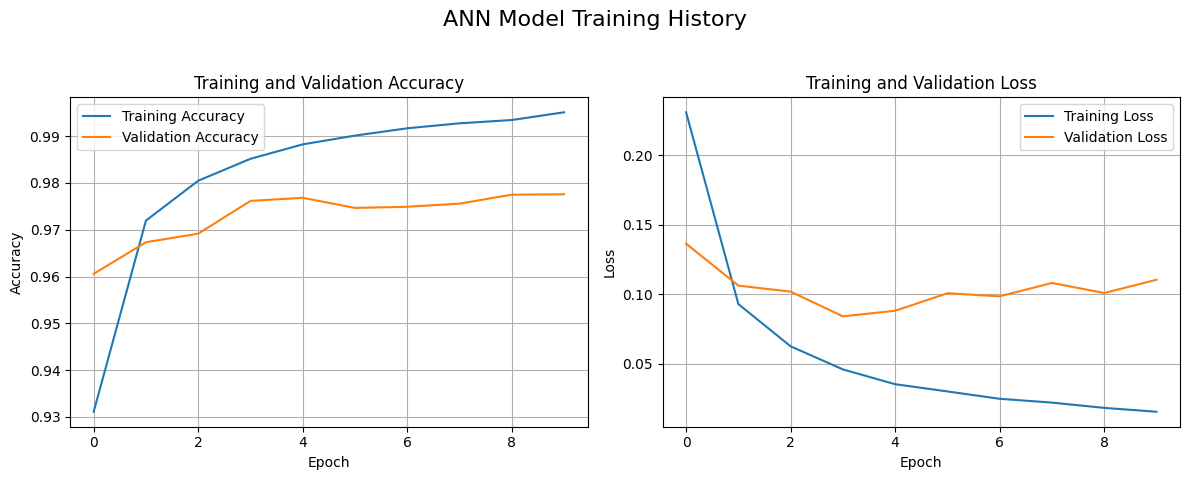

In [58]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

# Subplot 2: Loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

# Add a main title to the figure
plt.suptitle('ANN Model Training History', fontsize=16)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()


## Make Sample Predictions and Visualize

### Subtask:
Select a few random images from the test dataset, use the trained model to predict their labels, and visualize these images along with their true labels and the model's predicted labels.


**Reasoning**:
I will select a random sample of 10 test images, make predictions using the trained ANN model, and then visualize each image with its true and predicted labels to evaluate the model's performance visually.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


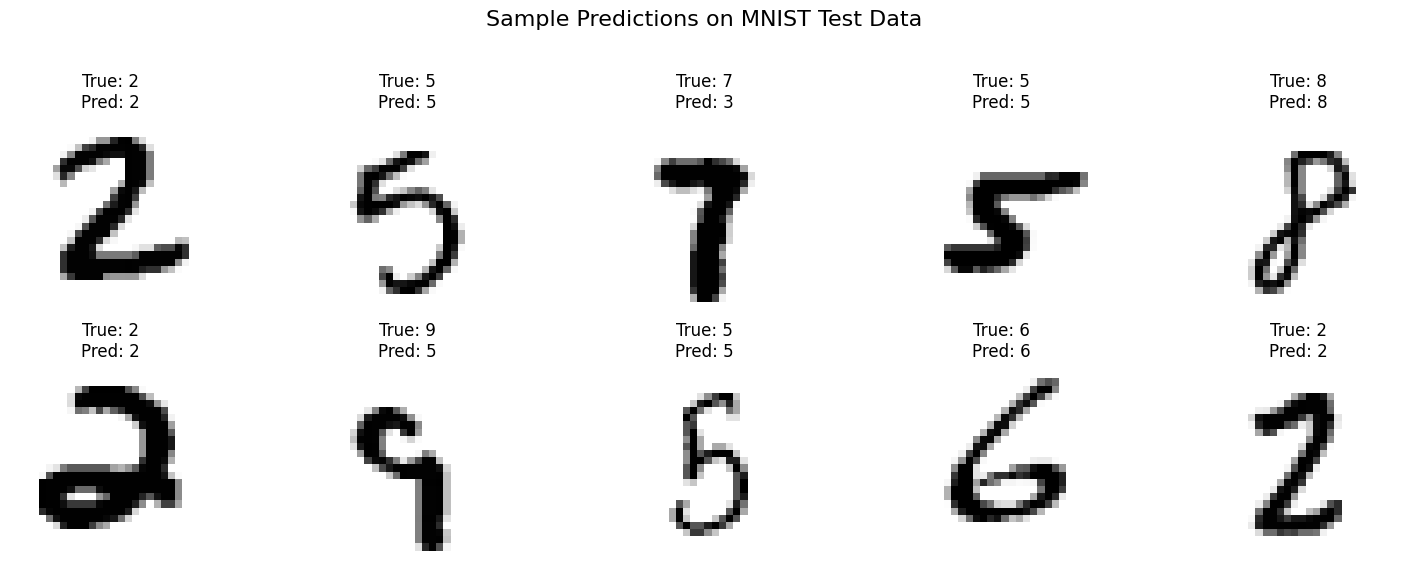

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random sample of 10 indices from the test dataset
num_samples_to_show = 10
random_indices = np.random.choice(len(x_test), num_samples_to_show, replace=False)

# Get the corresponding original images, true labels, and normalized data for prediction
sample_images = x_test[random_indices]
sample_true_labels = y_test[random_indices]
sample_normalized_data = x_test_normalized[random_indices]

# Use the trained model to predict class probabilities for the selected images
sample_predictions_prob = model.predict(sample_normalized_data)

# Convert predicted probabilities to predicted class labels
sample_predicted_labels = np.argmax(sample_predictions_prob, axis=1)

# Create a figure with subplots to display the selected images
plt.figure(figsize=(15, 6))

for i in range(num_samples_to_show):
    plt.subplot(2, 5, i + 1) # Arrange in 2 rows, 5 columns
    plt.imshow(sample_images[i], cmap=plt.cm.binary) # Display original image
    plt.title(f"True: {sample_true_labels[i]}\nPred: {sample_predicted_labels[i]}")
    plt.axis('off')

plt.suptitle('Sample Predictions on MNIST Test Data', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap with suptitle
plt.show()


## Final Task

### Subtask:
Provide a comprehensive summary of the entire MNIST classification task.


## Summary:

### Data Analysis Key Findings

*   The trained Artificial Neural Network (ANN) model achieved a **test loss of 0.1018** and a **test accuracy of 0.9788** (97.88%) on the unseen test dataset.
*   Training history plots were successfully generated, illustrating the model's learning progression by showing both training and validation accuracy and loss over epochs.
*   Random sample predictions were made on 10 test images, and these images were visualized along with their true labels and the model's predicted labels, allowing for a visual assessment of the model's performance on individual cases.

### Insights or Next Steps

*   The model demonstrates strong generalization capabilities, as indicated by its high accuracy and low loss on the unseen test data, suggesting it is well-suited for the MNIST digit classification task.
*   Further analysis could involve investigating specific misclassified samples from the visualization step to understand common patterns or types of errors the model makes, which might inform future model improvements.
